In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


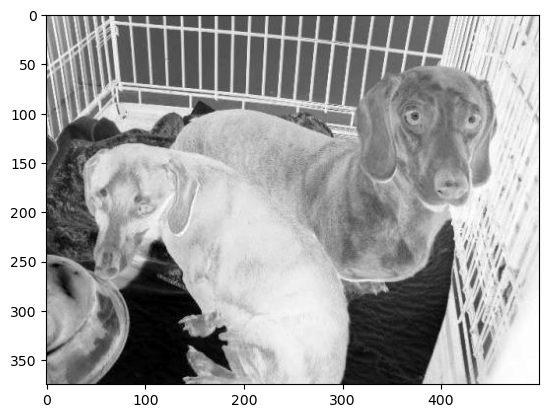

1


In [2]:
DATADIR = "/home/aniruth/Desktop/RRC/Deep Learning/Cats and Dogs/PetImages" # enter the file path here 
CATEGORIES = ["Dog","Cat"]
count = 0

for category in CATEGORIES :
    path = os.path.join(DATADIR,category) # joins the path to cat and dog to to the PetImages folder 
    
    for img in os.listdir(path): # gets all the files and the directeries 

        # colour is not really the differentiating factor -> we dont care abt the colour 
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) # reads the image at the path joined by path + img 
        plt.imshow(img_array,cmap = plt.cm.binary)
        plt.show()
        count += 1 
        
        break
    break


print(count) # there are 25002 images and it iterates through all of them 

In [3]:
# one image pixel values (since we grayscaled it ist 2D else it ll be 3D )
print(img_array)
print(img_array.shape)
print(img_array.ndim)

[[ 96  98 103 ...  27  16  13]
 [ 99  99 104 ...  25  16  16]
 [ 99  99 102 ...  22  17  18]
 ...
 [ 87  96 103 ...   2   2   2]
 [ 86  92  99 ...   2   2   2]
 [ 89  91  97 ...   2   2   2]]
(375, 500)
2


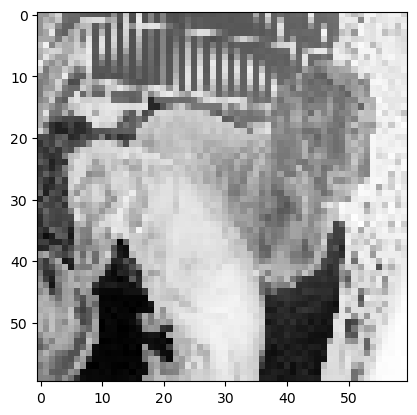

In [4]:
# Diff images have diff sizes -> so we rescale all the images 

# Check for diff image size 
img_size = 60

new_array = cv2.resize(img_array,(img_size,img_size))

plt.imshow(new_array , cmap = plt.cm.binary)
plt.show()



In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES :
        path = os.path.join(DATADIR,category) # joins the path to cat and dog to to the PetImages folder 

        if(category == "Dog"):
            class_num = 0
        else :
            class_num = 1

        
        for img in os.listdir(path): # gets all the files and the directeries 
            try :
                # colour is not really the differentiating factor -> we dont care abt the colour 
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) # reads the image at the path joined by path + img 
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])

            except Exception as e : # ignore all the broken images and os error 
                pass
    

create_training_data()
    

Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


In [6]:
print(len(training_data))

24946


In [7]:
# Shuffle the data -> rn its all dog and then all cat 

import random 
random.shuffle(training_data)


In [8]:
# Unpack the training data 

x_train = []
y_train = []

for x,y in training_data :
    x_train.append(x)
    y_train.append(y)


print(x_train[0])

# X has to be a numpy array . It cant be a list -> y can be a list 

x_train = np.array(x_train).reshape(-1,img_size,img_size,1) # (no fo images , x , y , gray = 1 || rgb = 3)

print(x_train[0].shape)
print(x_train[0])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print shapes of training and test sets
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)


[[250 253 250 ... 253 253 253]
 [250 252 252 ... 252 252 253]
 [253 253 253 ... 253 253 253]
 ...
 [155 165 162 ... 204 211 197]
 [245 120  98 ... 200 226 207]
 [162 170 144 ... 186 189 194]]
(60, 60, 1)
[[[250]
  [253]
  [250]
  ...
  [253]
  [253]
  [253]]

 [[250]
  [252]
  [252]
  ...
  [252]
  [252]
  [253]]

 [[253]
  [253]
  [253]
  ...
  [253]
  [253]
  [253]]

 ...

 [[155]
  [165]
  [162]
  ...
  [204]
  [211]
  [197]]

 [[245]
  [120]
  [ 98]
  ...
  [200]
  [226]
  [207]]

 [[162]
  [170]
  [144]
  ...
  [186]
  [189]
  [194]]]
Training set shape: (19956, 60, 60, 1)
Test set shape: (4990, 60, 60, 1)


In [9]:
# Save our data -> use pickle ( for safety -> to use later ) 
import pickle

pickle_out = open("x_train.pickle","wb")
pickle.dump(x_train , pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train , pickle_out)
pickle_out.close()




In [10]:
pickle_in = open("x_train.pickle","rb")
x_train_new = pickle.load(pickle_in)

print(x_train_new[0])

[[[ 18]
  [ 18]
  [ 20]
  ...
  [117]
  [ 58]
  [ 62]]

 [[ 22]
  [ 22]
  [ 19]
  ...
  [125]
  [ 62]
  [ 43]]

 [[ 22]
  [ 19]
  [ 18]
  ...
  [ 88]
  [ 58]
  [ 40]]

 ...

 [[ 54]
  [ 55]
  [ 59]
  ...
  [ 32]
  [ 61]
  [ 55]]

 [[ 67]
  [ 58]
  [ 71]
  ...
  [ 70]
  [ 54]
  [ 70]]

 [[ 37]
  [ 74]
  [ 60]
  ...
  [ 45]
  [ 30]
  [ 26]]]


In [11]:
# # We are using CNN over ANN to reduce computations and to identify features quickly 

# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense , Flatten 

# # To analyse the data , we use tensorboard 
# from tensorflow.keras.callbacks import TensorBoard

# # We are going to do convolution and max pooling 
# from tensorflow.keras.layers import Conv2D, MaxPooling2D
# import time 

# # NAME = "Cats-vs-dog-64x2-with_dense{}".format(int(time.time()))


# # Normalise the data 
# x_train =  tf.keras.utils.normalize(x_train , axis = 1)

# # print(x_train[0])
# # Optimising the model  
# # Choosing the perfect model 

# # No of layers , node per layer , conv layer 

# dense_layers = [0,1,2]
# layer_sizes = [32,64,128]
# conv_layers = [1,2,3]

# for dense_layer in dense_layers :
#     for layer_size in layer_sizes :
#         for conv_layer in conv_layers :
#             NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer,layer_size,dense_layer,int(time.time()))
#             # print(NAME)
#             tb_callback= TensorBoard(log_dir="abunchoflog/{}".format(NAME)) # name of each model 

            
#             model = Sequential()
            
            
#             # layer 1 : Conv and pooling 
#             # arguments = (no of filters , window size ,activation)

#             # first conv layer need to have the input shape 
#             model.add ( Conv2D(layer_size,(3,3),input_shape = x_train.shape[1:],activation = "relu") ) # we skip the (-1) in the x_shape
#             model.add(MaxPooling2D(pool_size=(2,2)))# defualt striding is (1,1)

#             for l in range(conv_layer-1): # no input shape reqd -> so (-1 in the iteration ) 
#                 model.add ( Conv2D(layer_size,(3,3),activation = "relu") ) # we skip the (-1) in the x_shape
#                 model.add(MaxPooling2D(pool_size=(2,2)))# defualt striding is (1,1)

#             # Flatten before passing through the dense layer 
#             model.add(Flatten()) # convert to 1D
            
#             for l in range(dense_layer):
#                  # layer 2 : Hidden layers 
#                 model.add(Dense(units = layer_size,activation = "relu"))
            
        
            
#             # layer 3 : output layer 
#             model.add(Dense(units = 1,activation = "sigmoid"))

#             #Its binary so use binary loss
#             model.compile(
#                 loss=tf.keras.losses.BinaryCrossentropy(),     
#                 optimizer=tf.keras.optimizers.Adam(0.001),metrics =["accuracy"], # Metric is what we want to measure 
#             )
            
#             x_train = np.array(x_train)
#             y_train = np.array(y_train)
            
#             # fit it
#             # Validation split is to choose the validation set and run our models and pick the best one -> CV set 
            
#             # Analysing the model -> using tensorflow 
#             model.fit(x_train,y_train,batch_size = 64,validation_split = 0.1,epochs = 8,callbacks = [tb_callback]) # send the input in batch size 


# # Run all of them and chose the one with the lowest validation loss 


In [12]:
# We are using CNN over ANN to reduce computations and to identify features quickly 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten 

# To analyse the data , we use tensorboard 
from tensorflow.keras.callbacks import TensorBoard

# We are going to do convolution and max pooling 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import time 

# NAME = "Cats-vs-dog-64x2-with_dense{}".format(int(time.time()))


# Normalise the data 
x_train =  tf.keras.utils.normalize(x_train , axis = 1)

# print(x_train[0])
# Optimising the model  
# Choosing the perfect model 

# No of layers , node per layer , conv layer 

dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers :
    for layer_size in layer_sizes :
        for conv_layer in conv_layers :
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer,layer_size,dense_layer,int(time.time()))
            # print(NAME)
            tb_callback= TensorBoard(log_dir="final_chosen_model/{}".format(NAME)) # name of each model 

            
            model = Sequential()
            
            
            # layer 1 : Conv and pooling 
            # arguments = (no of filters , window size ,activation)

            # first conv layer need to have the input shape 
            model.add ( Conv2D(layer_size,(3,3),input_shape = x_train.shape[1:],activation = "relu") ) # we skip the (-1) in the x_shape
            model.add(MaxPooling2D(pool_size=(2,2)))# defualt striding is (1,1)

            for l in range(conv_layer-1): # no input shape reqd -> so (-1 in the iteration ) 
                model.add ( Conv2D(layer_size,(3,3),activation = "relu") ) # we skip the (-1) in the x_shape
                model.add(MaxPooling2D(pool_size=(2,2)))# defualt striding is (1,1)

            # Flatten before passing through the dense layer 
            model.add(Flatten()) # convert to 1D
            
            for l in range(dense_layer):
                 # layer 2 : Hidden layers 
                model.add(Dense(units = layer_size,activation = "relu"))
            
        
            
            # layer 3 : output layer 
            model.add(Dense(units = 1,activation = "sigmoid"))

            #Its binary so use binary loss
            model.compile(
                loss=tf.keras.losses.BinaryCrossentropy(),     
                optimizer=tf.keras.optimizers.Adam(0.001),metrics =["accuracy"], # Metric is what we want to measure 
            )
            
            x_train = np.array(x_train)
            y_train = np.array(y_train)
            
            # fit it
            # Validation split is to choose the validation set and run our models and pick the best one -> CV set 
            
            # Analysing the model -> using tensorflow 
            model.fit(x_train,y_train,batch_size = 64,validation_split = 0.1,epochs = 8,callbacks = [tb_callback]) # send the input in batch size 


# Run all of them and chose the one with the lowest validation loss 


2024-03-17 12:15:26.173228: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-17 12:15:26.173637: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-17 12:15:26.175670: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-17 12:15:26.207760: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-17 12:15:26.851512: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

Epoch 1/8
281/281 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.5380 - loss: 0.6849 - val_accuracy: 0.6333 - val_loss: 0.6422
Epoch 2/8
281/281 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - accuracy: 0.6520 - loss: 0.6314 - val_accuracy: 0.6869 - val_loss: 0.5899
Epoch 3/8
281/281 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - accuracy: 0.6947 - loss: 0.5828 - val_accuracy: 0.7209 - val_loss: 0.5436
Epoch 4/8
281/281 ━━━━━━━━━━━━━━━━━━━━ 16s 56ms/step - accuracy: 0.7247 - loss: 0.5445 - val_accuracy: 0.7425 - val_loss: 0.5191
Epoch 5/8
281/281 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - accuracy: 0.7395 - loss: 0.5153 - val_accuracy: 0.7725 - val_loss: 0.4805
Epoch 6/8
281/281 ━━━━━━━━━━━━━━━━━━━━ 16s 56ms/step - accuracy: 0.7660 - loss: 0.4920 - val_accuracy: 0.7435 - val_loss: 0.5161
Epoch 7/8
281/281 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.7745 - loss: 0.4783 - val_accuracy: 0.7480 - val_loss: 0.4943
Epoch 8/8
281/281 ━━━━━━━━━━━━━━━━━━━━ 16s 57ms/step - accuracy: 0.7753 - loss: 0.4692 - val_accu

In [13]:
# Testing the test data !!
x_test = np.array(x_test).reshape(-1,img_size,img_size,1) # (no of images , x , y , gray = 1 || rgb = 3)
y_test = np.array(y_test)
y_pred = model.predict(x_test)
# print(f"Accuracy is {test_acc*100}%")
# print(f"Loss is {test_loss}")

for i in range(len(y_pred)):
    if(y_pred[i])>0.5: # sigmoid function 
        y_pred[i] = 1
    else :
        y_pred[i] = 0



156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


In [16]:
# compare y_pred and y_test 

accuracy = 0

for i in range(len(y_pred)):
    if(y_pred[i]==y_test[i]):
        accuracy +=1 

print(f"Accuracy is {accuracy*100/len(y_pred)}%")

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy is 70.1002004008016%
Accuracy: 0.701002004008016


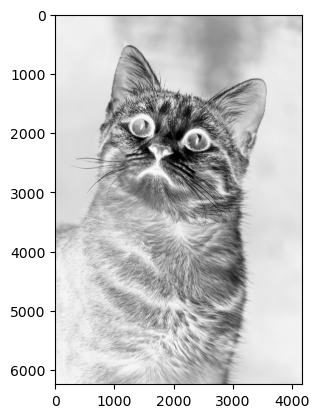

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Cat


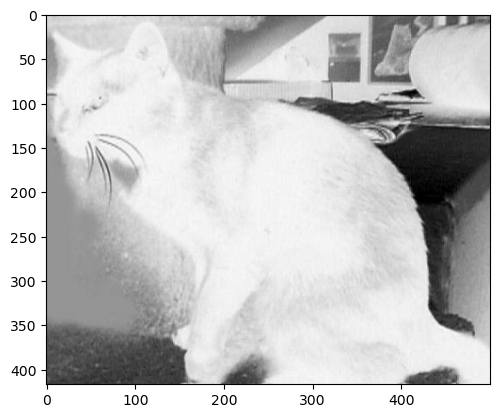

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Dog


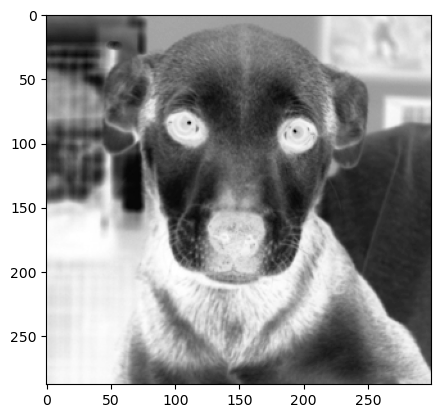

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Dog


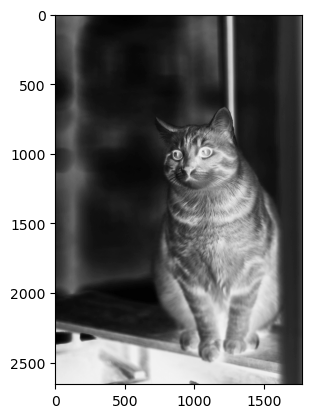

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Cat


In [15]:
path1 = "/home/aniruth/Desktop/RRC/Deep Learning/Cats and Dogs/TestImages"

predict = ["Dog","Cat"]
for img in os.listdir(path1): # gets all the files and the directeries 
    # colour is not really the differentiating factor -> we dont care abt the colour 
    img_array = cv2.imread(os.path.join(path1,img),cv2.IMREAD_GRAYSCALE) # reads the image at the path joined by path + img 
    # print(img_array)
    # count += 1 
    img_size = 60
    new_array = cv2.resize(img_array, (img_size,img_size))
    new_array = np.array(new_array).reshape(-1,img_size,img_size,1) 
    plt.imshow(img_array,cmap = plt.cm.binary)
    plt.show()
    prediction = model.predict(new_array)
    print(predict[int(prediction[0][0])])
    # print(img_size)
        